#### .venv

> python -m ipykernel install --user --name=parkinson-env --display-name "Python (Parkinson)"


# 1. Dependencias

In [ ]:
import os

# Mudar o path se precisar
os.chdir("/parkinson-classifier")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from src.config import DATA_PATH, TEST_SIZE, SEED, INPUT_SIZE

# Extrator de características (Visão Computacional)
from src.feature_extractor import get_features_extractor, preprocess_input
from src.data_loader import load_data

# Classificador (Machine Learning Clássico)
from src.model_builder import build_mlp
from src.trainer import train_and_evaluate


# Utiliza o ResNet50 como um "olho" treinado para extrair informações relevantes da imagem e, em seguinda, um classificador mais simples (MLP) para tomar a decisão final com base nessas informações.

# 2. Inicializa o modelo de extração de características

In [ ]:
# A variável contém um "extrator de características". A função dele é receber uma imagem e transformá-la em um vetor de 2048 números que representam a "essência" daquela imagem.
extractor_model = get_features_extractor()

# 3. Carrega e processa os dados

In [ ]:
# Chama a função `load_data`. O trabalho dela é iterar sobre todas as imagens (healthy e parkinson) e usar o extractor_model criado anteriormente.
pastas = [f"{DATA_PATH}/train", f"{DATA_PATH}/test"]
X, y = load_data(pastas, extractor_model, preprocess_input)

# 4. Divide em treino e teste


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=SEED
)
# train_test_split = Divide os dados. O modelo aprenderá como `X_train` e `y_train`. Depois, ele será testado com `X_test` e `y_test`, dados que ele nunca viu, para uma avaliação honesta de seu desempenho.

# 5. Padroniza os dados


In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# StandardScaler = Os 2048 números que a ResNet50 gera podem ter escalas muito diferentes. O `StandardScaler` ajusta todos eles para que tenham uma média próxima de 0 e um desvio padrão de 1. Isso ajuda o classificador MLP a convergir mais rápido e a ter um desempenho melhor, pois nenhuma característica dominará as outras apenas por ter uma escala maior.

# 6. Constrói o modelo MLP


In [ ]:
mlp_model = build_mlp() # Constrói o classificador final, o mlp_model é o cérebro que vai aprender a mapear os padrões extraídos pelo "olho" (ResNet50) para um diagnóstico

# 7. Treinamento e avaliação



🔍 Treinando modelo...

✅ Relatório de Classificação:
              precision    recall  f1-score   support

    Saudável       0.76      0.90      0.83        21
   Parkinson       0.88      0.70      0.78        20

    accuracy                           0.80        41
   macro avg       0.82      0.80      0.80        41
weighted avg       0.82      0.80      0.80        41



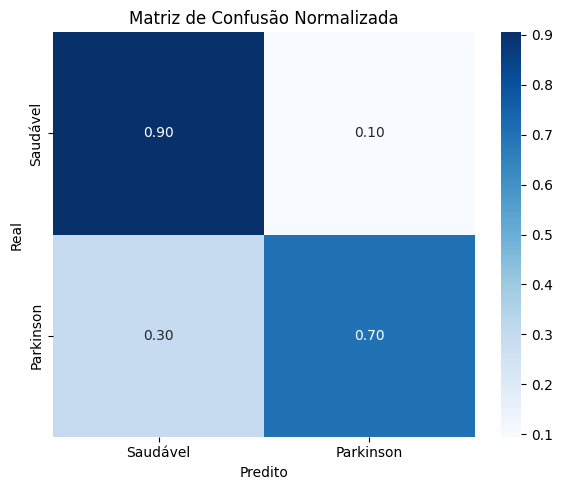

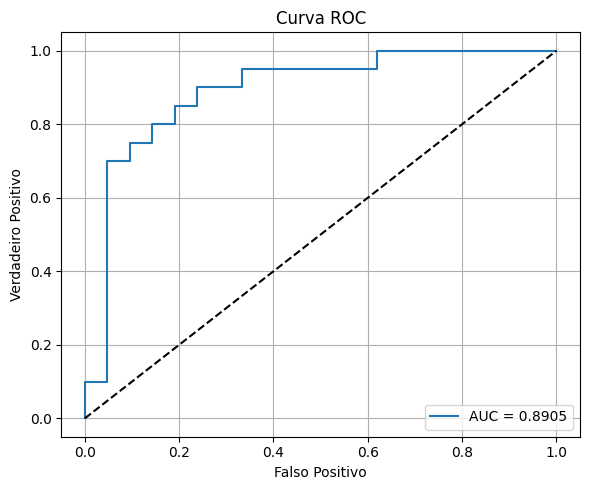

,Accuracy,Balanced Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.804878,0.802381,0.875,0.7,0.777778,0.890476


In [42]:
metricas_df = train_and_evaluate(mlp_model, X_train, y_train, X_test, y_test)
metricas_df